# Importing Libraries


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



# Loading the Dataset

In [58]:
df = pd.read_csv('/content/hotel_bookings 2.csv')
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


# Exploratory Data Analysis

In [59]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [60]:
df.shape

(119390, 32)

In [61]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [63]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"], dayfirst=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [65]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [66]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

# Data Pre-processing

## Handling Missing Values

In [67]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [68]:
df.drop(['company','agent'], axis =1, inplace = True)
df.dropna(inplace =True)

In [69]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [70]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [71]:
df = df[df['adr']<5000]

In [72]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


# Data Analysis and Visualization

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


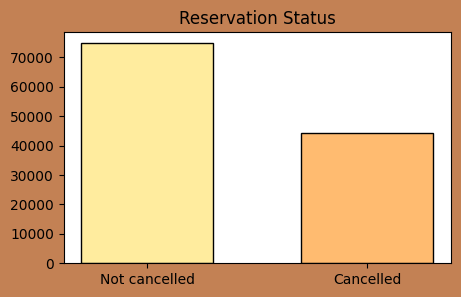

In [73]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)
colors = sns.color_palette(["#FFEC9E", "#FFBB70"])

plt.figure(figsize = (5,3),facecolor="#C38154")
plt.title('Reservation Status')
plt.bar(['Not cancelled' , 'Cancelled'],df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.6,color=colors)
plt.show()

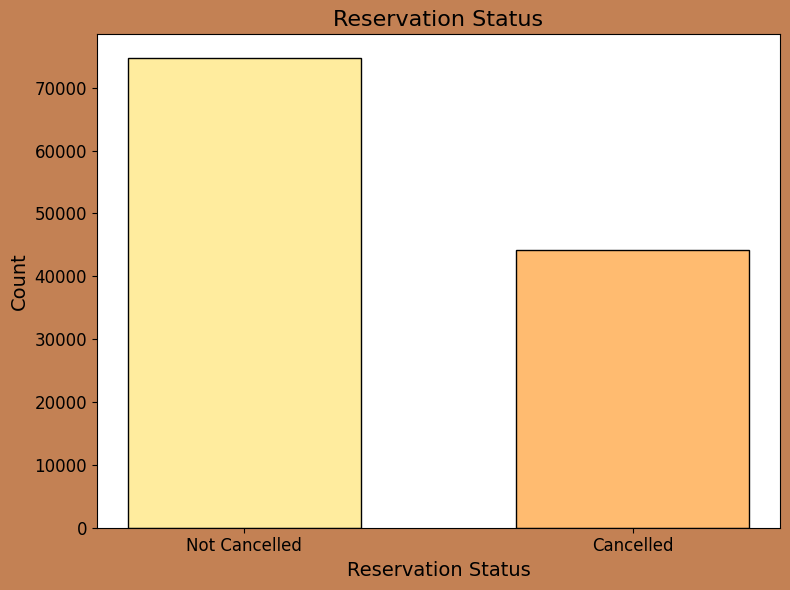

In [74]:
# Calculate cancellation percentages
cancelled_perc = df['is_canceled'].value_counts(normalize=True)

# Define color palette
colors = sns.color_palette(["#FFEC9E", "#FFBB70"])

# Plot
plt.figure(figsize=(8, 6), facecolor='#C38154')  # Set background color to light gray
plt.title('Reservation Status', fontsize=16, color='Black')
plt.bar(['Not Cancelled', 'Cancelled'], df['is_canceled'].value_counts(), edgecolor='black', width=0.6, color=colors)
plt.xlabel('Reservation Status', fontsize=14, color='Black')
plt.ylabel('Count', fontsize=14, color='Black')
plt.xticks(fontsize=12, color='Black')
plt.yticks(fontsize=12, color='Black')
plt.tight_layout()
plt.savefig('reservation_status_plot.png', bbox_inches='tight', transparent=True)
plt.show()

The provided bar graph illustrates the cancellation and non-cancellation percentages for reservations. It is evident that a substantial portion of reservations remains unaffected by cancellations. Notably, 37% of clients have chosen to cancel their reservations, and this has a noteworthy impact on the hotels' revenue.

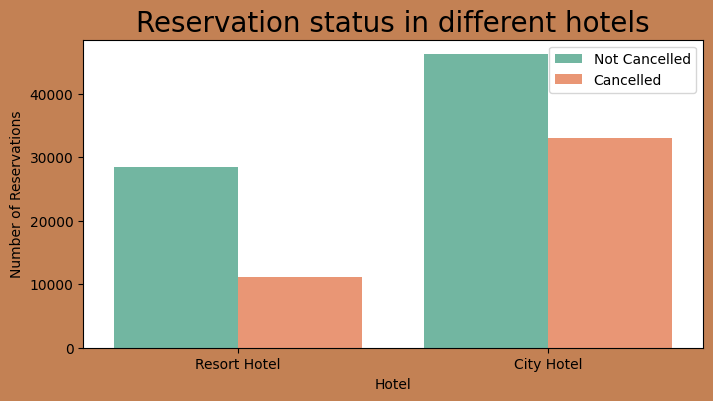

In [75]:
# Set the background color of the figure
plt.figure(figsize=(8, 4), facecolor='#C38154')

# Create the countplot
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette="Set2")

# Customize legend location
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))

# Set plot title and axis labels
plt.title('Reservation status in different hotels', size=20, color='Black')
plt.xlabel('Hotel',color='Black')
plt.ylabel('Number of Reservations', color='Black')

# Customize legend labels
plt.legend(['Not Cancelled', 'Cancelled'])

# Show the plot
plt.show()

In comparison to resort hotels, city hotels have more bookings. Its possible that resort hotels are more expensive that those in cities.


In [76]:
#checking the graph cancelation rate in percentage for Resort Hotel
resort_hotel= df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [77]:
# checking the Above graph Cancellation rate in percentage for City Hotel
city_hotel = df[df['hotel']== 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize =True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [78]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

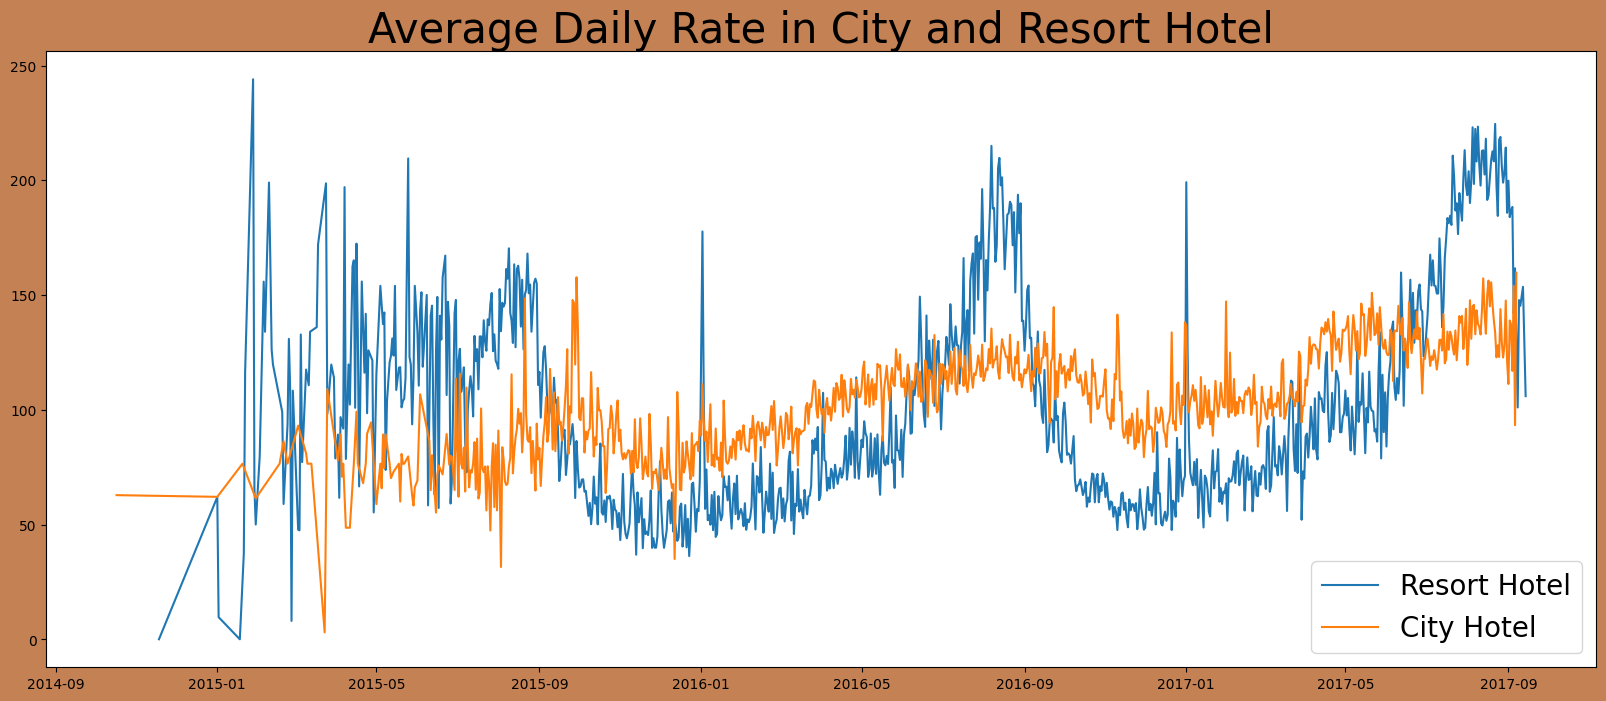

In [79]:
plt.figure(figsize=(20,8), facecolor='#C38154')
plt.title('Average Daily Rate in City and Resort Hotel', fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label = 'Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label = 'City Hotel')
plt.legend(fontsize=20)
plt.show()

The line graph above shows that, on certain days the average daily rate for a city hotel is less than that of a resort hotel and on other days, it is even less.
It goes without saying that weekends and holidays may see a rise in resort hotel rates.

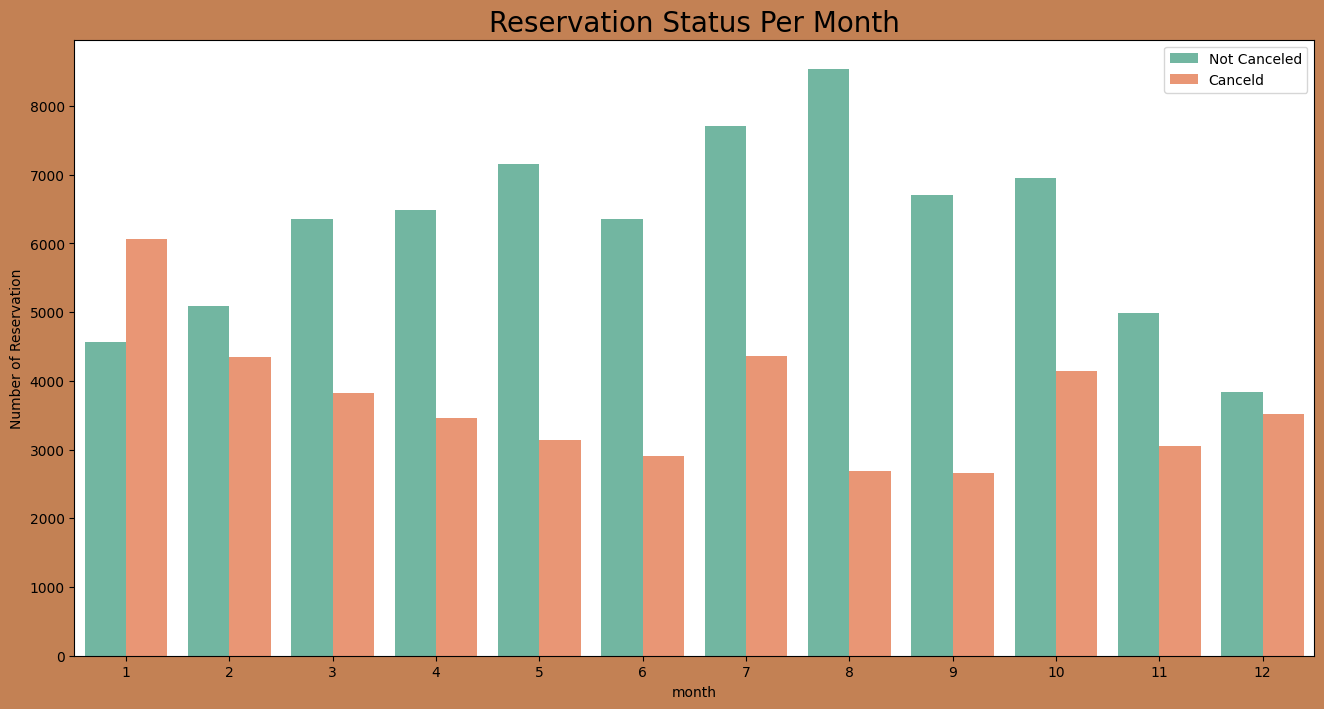

In [80]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8), facecolor='#C38154')
ax1 = sns.countplot(x='month', hue='is_canceled', data= df, palette = 'Set2')
legend_lebels,_ = ax1.get_legend_handles_labels()
plt.title('Reservation Status Per Month', size = 20)
plt.xlabel('month')
plt.ylabel('Number of Reservation')
plt.legend(['Not Canceled','Canceld'])
plt.show()

We've created a grouped bar graph to examine the months with the highest and lowest reservation levels based on their status. It's evident that the month of August stands out, having the highest numbers of both confirmed and canceled reservations. In contrast, January has the fewest confirmed reservations but the highest number of canceled reservations.

In [81]:
df['adr']

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 118897, dtype: float64

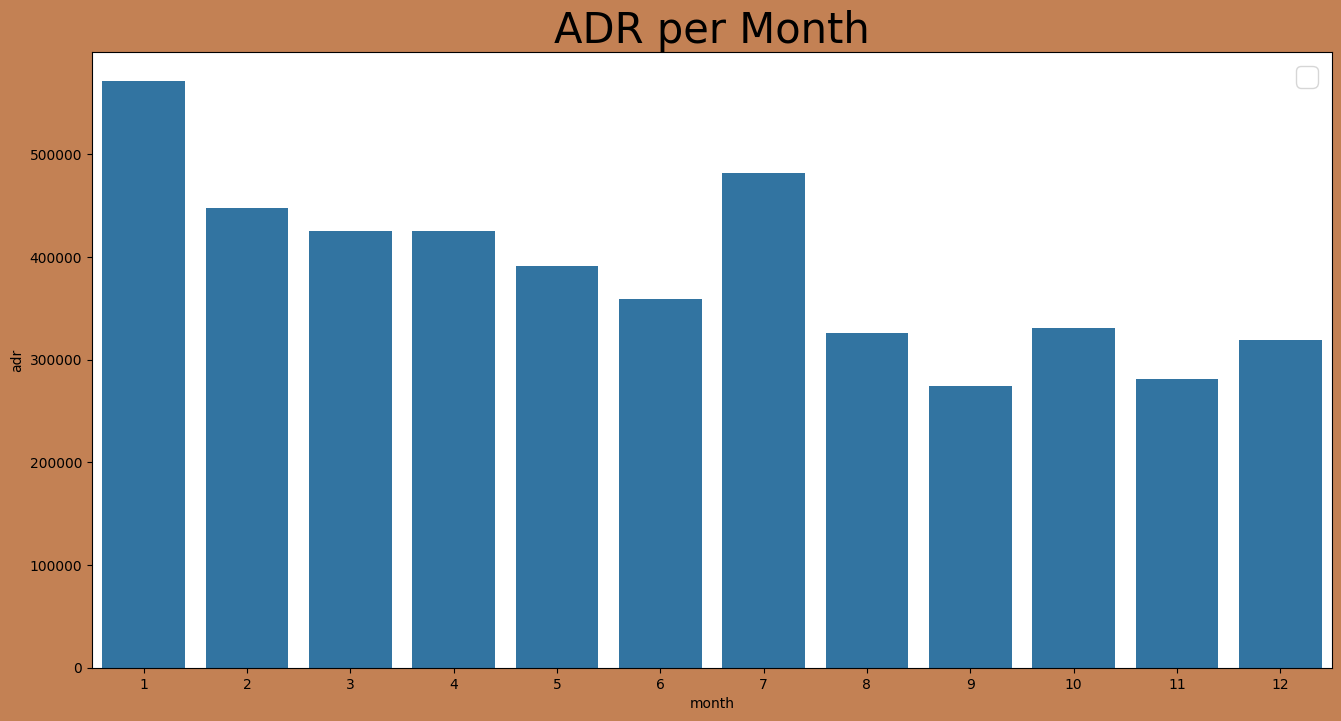

In [82]:
plt.figure(figsize=(16,8), facecolor='#C38154')
plt.title('ADR per Month', fontsize = 30)

data = df[df['is_canceled'] == 1].groupby('month')['adr'].sum().reset_index()
sns.barplot(x='month', y='adr', data = data )
plt.legend(fontsize = 20)
plt.show()

This bar graph illustrates that cancellations are most frequent when prices are at their highest and least common when prices are at their lowest. Consequently, the price of accommodation appears to be the primary factor influencing cancellations.
Now, let's examine which country experiences the highest number of canceled reservations. Portugal stands out as the top country with the highest number of cancellations.

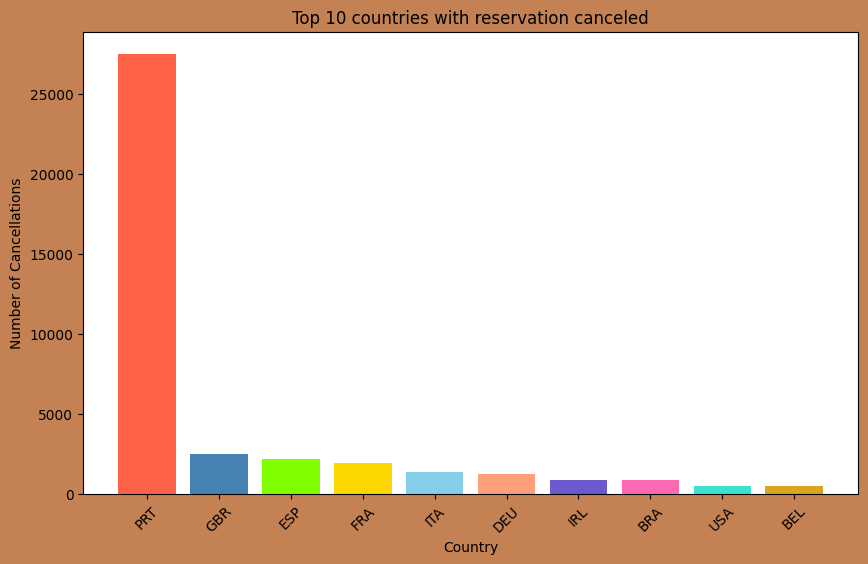

In [83]:

cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]

custom_colors = ['#FF6347', '#4682B4', '#7FFF00', '#FFD700', '#87CEEB', '#FFA07A', '#6A5ACD', '#FF69B4', '#40E0D0', '#DAA520']

plt.figure(figsize=(10, 6), facecolor='#C38154')
plt.title('Top 10 countries with reservation canceled', color="black")
plt.bar(top_10_country.index, top_10_country.values, color=custom_colors)
plt.xlabel('Country')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.show()


Let's analyze the sources from which guests are making hotel reservations, including Direct, Groups, Online Travel Agencies, and Offline Travel Agents.
Approximately 46% of clients make reservations through online travel agencies, while 27% come through group bookings.
A mere 4% of clients choose to book hotels directly by visiting them in person and making reservations.

In [84]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [85]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [86]:
cancelled_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

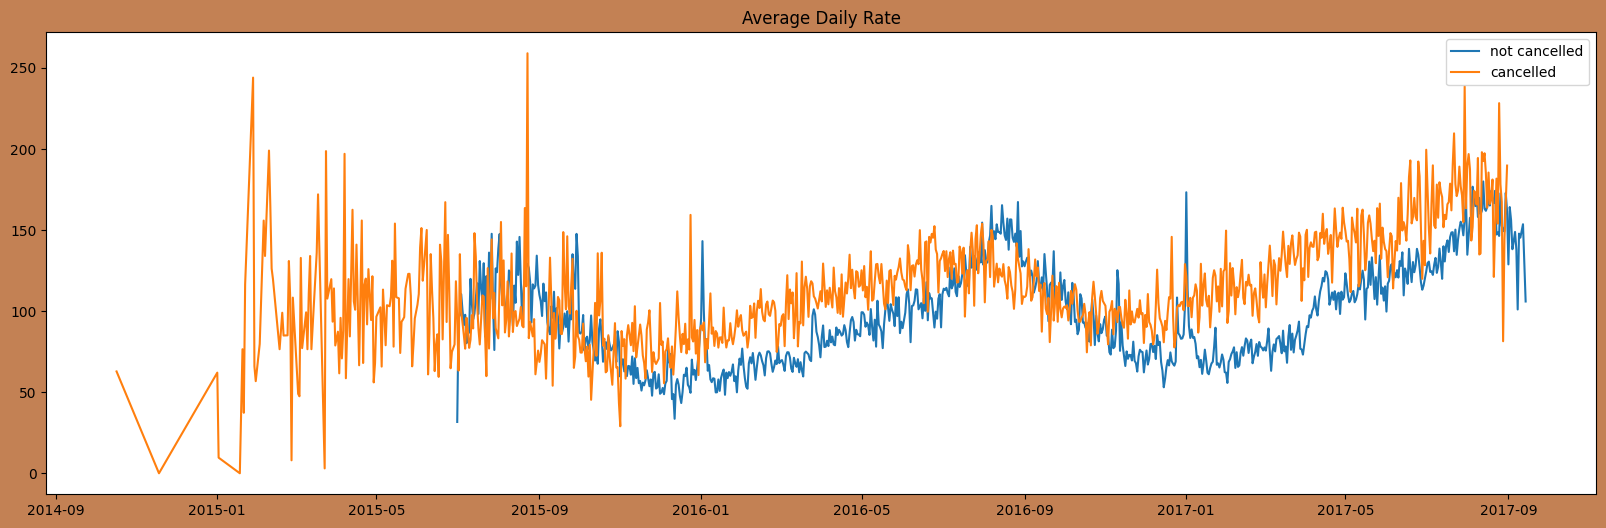

In [87]:
cancelled_df_adr= cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

not_cancelled_data=df[df['is_canceled']==0]
not_cancelled_df_adr= not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize=(20,6), facecolor='#C38154')
plt.title('Average Daily Rate', color="Black")
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend()
plt.show()

In [88]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016') & (cancelled_df_adr['reservation_status_date']<'2017-09')]

not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016') & (not_cancelled_df_adr['reservation_status_date']<'2017-09')]

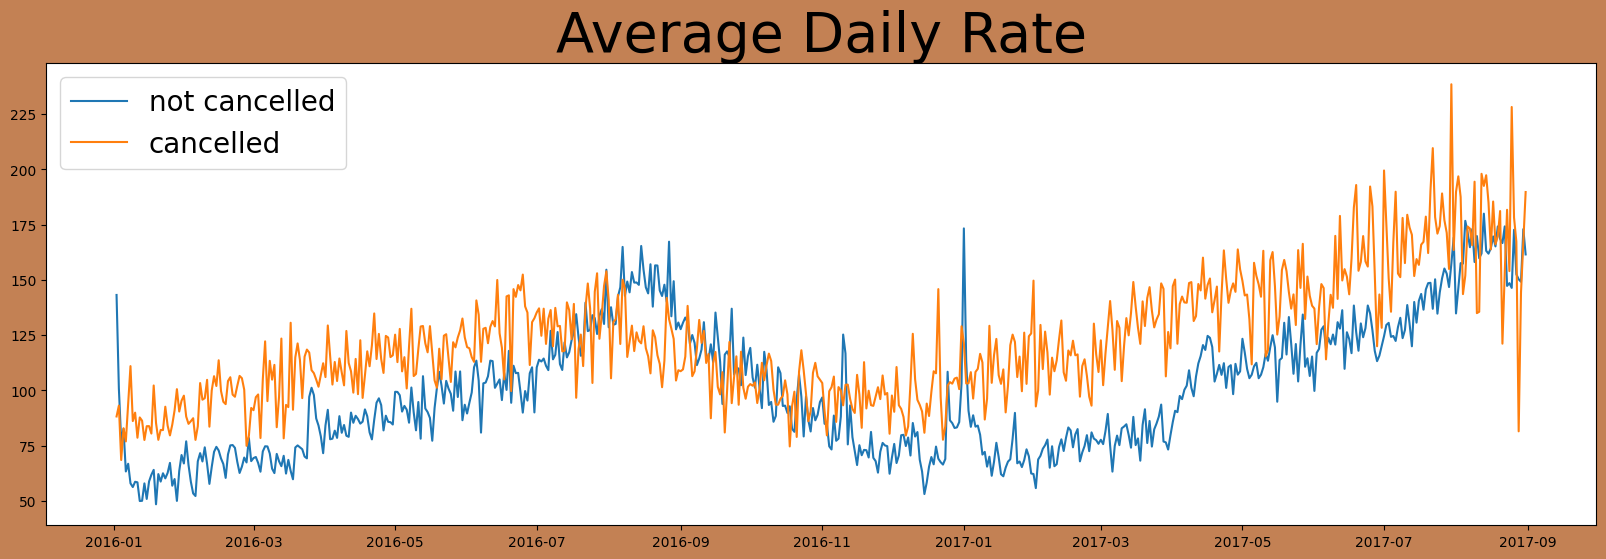

In [89]:
plt.figure(figsize=(20,6), facecolor='#C38154')
plt.title('Average Daily Rate', fontsize = 40)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend(fontsize = 20)
plt.show()

As seen in the graph, reservations are canceled when the average daily rate is higher than when it is not canceled.
It clearly proves all the above analysis that the higher price leads to higher cancellation

In [90]:
df['total_of_special_requests'].value_counts(normalize = True)

total_of_special_requests
0    0.588661
1    0.278569
2    0.108682
3    0.020917
4    0.002851
5    0.000320
Name: proportion, dtype: float64

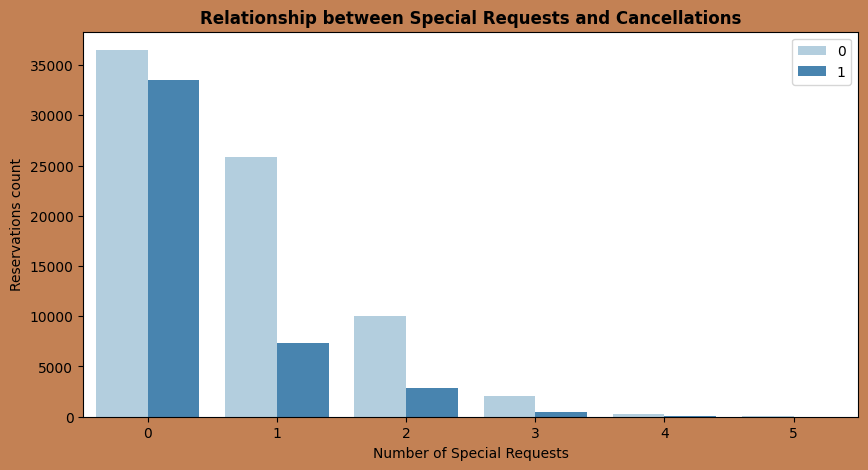

In [91]:
plt.figure(figsize = (10,5),dpi=100,facecolor='#C38154')
sns.countplot(data=df, x ="total_of_special_requests", hue = "is_canceled", palette= 'Blues')

plt.title("Relationship between Special Requests and Cancellations", weight = 'bold')
plt.xlabel("Number of Special Requests")
plt.ylabel("Reservations count")
plt.legend(loc="upper right")
plt.show()

In [92]:
df.groupby('meal')['is_canceled'].value_counts()

meal       is_canceled
BB         0              57411
           1              34451
FB         1                478
           0                320
HB         0               9453
           1               4981
SC         0               6682
           1               3956
Undefined  0                879
           1                286
Name: count, dtype: int64

Text(0, 0.5, 'Reservation Count')

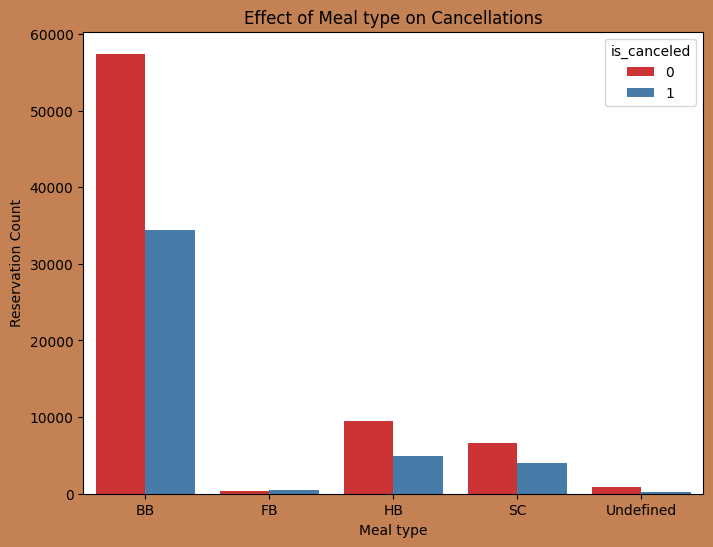

In [93]:
plt.figure(figsize=(8,6),facecolor='#C38154')
sns.countplot(data = df, x= 'meal', hue = 'is_canceled', palette= 'Set1')

plt.title ('Effect of Meal type on Cancellations')
plt.xlabel("Meal type")
plt.ylabel('Reservation Count')

# Model Prediction

## Train test split & feature selection

In [94]:
feature = df[['lead_time', 'arrival_date_year', 'arrival_date_week_number','stays_in_week_nights',
                   'previous_cancellations','previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
                    'adr', 'required_car_parking_spaces', 'total_of_special_requests',
                  ]]

label =  df['is_canceled']

In [95]:
X = feature
y = label

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data scaling

In [97]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled = scaler.transform(X_train)
scaled = scaler.transform(X_test)

## Random Forest Classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=140,max_features='auto', max_depth=20)
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RFC

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     14841
           1       0.84      0.69      0.76      8939

    accuracy                           0.83     23780
   macro avg       0.84      0.81      0.82     23780
weighted avg       0.83      0.83      0.83     23780


confusion matrix


<Axes: >

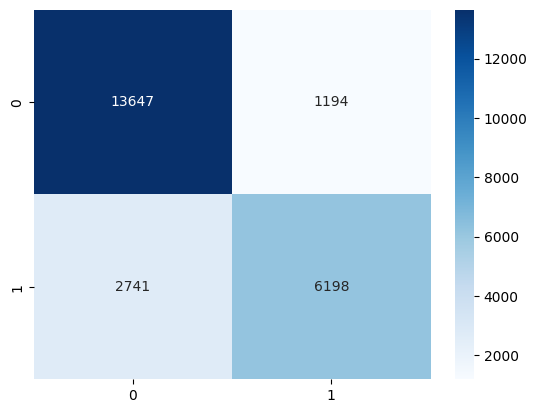

In [99]:
print('RFC' + '\n')
print(classification_report(y_test,rfcpred))
print('\n' + 'confusion matrix')
sns.heatmap(confusion_matrix(y_test,rfcpred),annot=True, fmt='g',cmap='Blues')

## KNN Classifier

In [100]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)

KNN

              precision    recall  f1-score   support

           0       0.79      0.86      0.82     14841
           1       0.72      0.62      0.67      8939

    accuracy                           0.77     23780
   macro avg       0.76      0.74      0.74     23780
weighted avg       0.76      0.77      0.76     23780


confusion matrix


<Axes: >

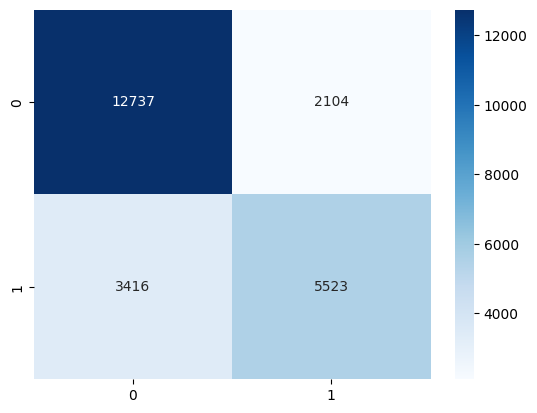

In [101]:
print('KNN' + '\n')
print(classification_report(y_test,knnpred))
print('\n' + 'confusion matrix')
sns.heatmap(confusion_matrix(y_test,knnpred),annot=True, fmt='g',cmap='Blues')

## Logistic Regression

In [102]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)
lrpredict = lr.predict(X_test)

LR

              precision    recall  f1-score   support

           0       0.74      0.88      0.81     14841
           1       0.71      0.49      0.58      8939

    accuracy                           0.74     23780
   macro avg       0.73      0.69      0.69     23780
weighted avg       0.73      0.74      0.72     23780


confusion matrix:



<Axes: >

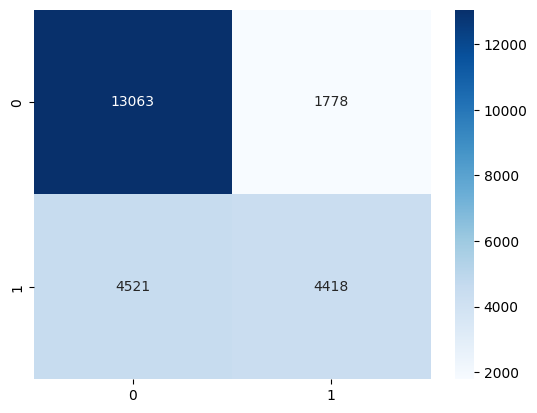

In [105]:
print('LR' + '\n')
print(classification_report(y_test,lrpredict))
print('\n' + 'confusion matrix:' + '\n')
sns.heatmap(confusion_matrix(y_test,lrpredict),annot=True, fmt='g',cmap='Blues')

# Feature Selection


<Axes: >

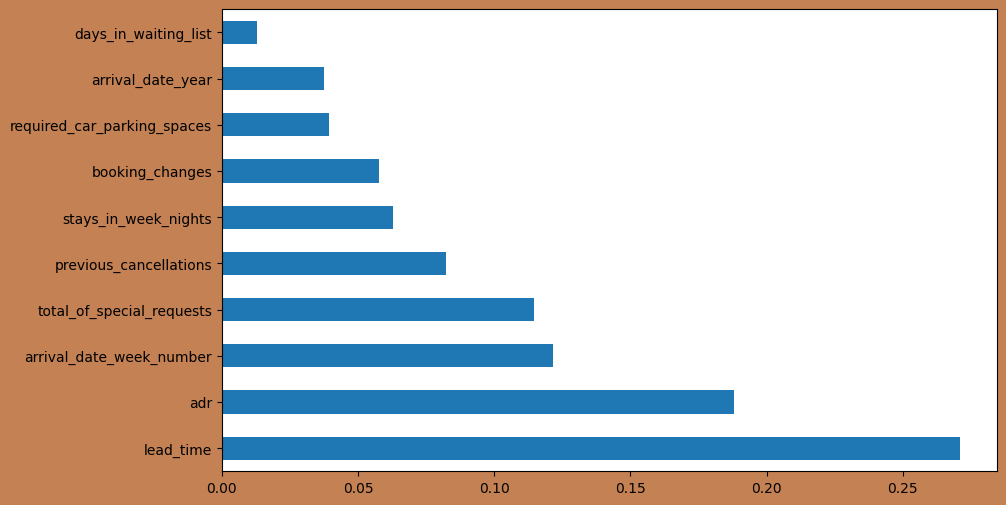

In [104]:
plt.figure(figsize=(10, 6), facecolor='#C38154')
importance = pd.Series(rfc.feature_importances_,index=feature.columns)
importance.nlargest(10).plot(kind='barh')